# 2.2 Problem Statement: Machine Learning 8

In this assignment we'll find the frequency of words in a webpage. We will urllib and BeautifulSoup to extract text from webpage.



In [1]:
pip install beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [2]:
import nltk
import urllib.request
from bs4 import BeautifulSoup
import re
import matplotlib.pyplot as plt
%matplotlib inline

# Fetching url and the html

In [3]:
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [4]:
print(soup.title)
print(soup.title.string)

<title>PHP: Hypertext Preprocessor</title>
PHP: Hypertext Preprocessor


# Extracting text and finding tokens

In [6]:
text = soup.get_text()
tokens = re.findall('\w+', text)

In [7]:
tokens[:15]   # printing words list

['PHP',
 'Hypertext',
 'Preprocessor',
 'Downloads',
 'Documentation',
 'Get',
 'Involved',
 'Help',
 'Getting',
 'Started',
 'Introduction',
 'A',
 'simple',
 'tutorial',
 'Language']

# converting tokens to lower case

In [8]:
words = []
for word in tokens:
  words.append(word.lower())
words[:5]

['php', 'hypertext', 'preprocessor', 'downloads', 'documentation']

# Removing Stopwords

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kisna\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [10]:
stopWords = nltk.corpus.stopwords.words('english')
stopWords[:5]

['i', 'me', 'my', 'myself', 'we']

In [11]:
print("Total including stopwords:", len(words))
clean_words = []
for w in words:
  if w not in stopWords:
    clean_words.append(w)
    
print("Length after stopwords:", len(clean_words) )
print("Total removed stopwords:", len(words)-len(clean_words) )
clean_words[:24]

Total including stopwords: 5998
Length after stopwords: 3855
Total removed stopwords: 2143


['php',
 'hypertext',
 'preprocessor',
 'downloads',
 'documentation',
 'get',
 'involved',
 'help',
 'getting',
 'started',
 'introduction',
 'simple',
 'tutorial',
 'language',
 'reference',
 'basic',
 'syntax',
 'types',
 'variables',
 'constants',
 'expressions',
 'operators',
 'control',
 'structures']

# words Frequency distribution

In [12]:
counts  = nltk.FreqDist(clean_words)
vocab   = len(counts.keys())
words   = sum(counts.values())
lexdiv  = float(words) / float(vocab)
print("Text has %i types and %i tokens for a lexical diversity of %0.3f" % (vocab, words, lexdiv))

Text has 416 types and 3855 tokens for a lexical diversity of 9.267


In [13]:
print(counts.most_common(10))

[('php', 305), ('7', 184), ('release', 161), ('found', 104), ('3', 93), ('4', 78), ('please', 76), ('version', 72), ('upgrading', 71), ('file', 70)]


In [14]:
print(counts.max())

php


In [15]:
print(counts.hapaxes()[0:10])

['hypertext', 'preprocessor', 'documentation', 'get', 'involved', 'getting', 'started', 'simple', 'tutorial', 'syntax']


In [16]:
counts.freq('php'), counts.freq('hypertext'),

(0.07911802853437094, 0.00025940337224383917)

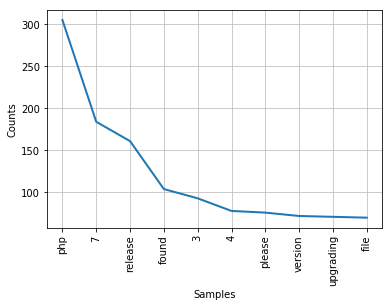

In [18]:
counts.plot(10, cumulative=False)

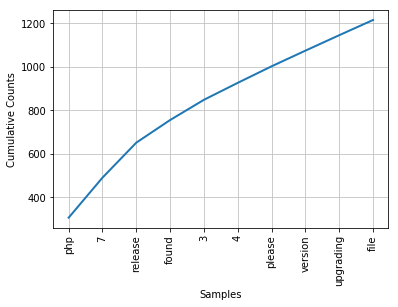

In [19]:
counts.plot(10, cumulative=True)